### Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

### Loading the data

In [7]:
df = pd.read_csv('Desktop/laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


### Shape and missing values of the dataset

In [9]:
print(df.shape)

(1275, 23)


In [10]:
print("Missing Values:")
df.isna().sum()

Missing Values:


Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

### Summary of the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [14]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


### Exploratory Data Analysis

In [16]:
top_companies=df['Company'].value_counts()[:10]

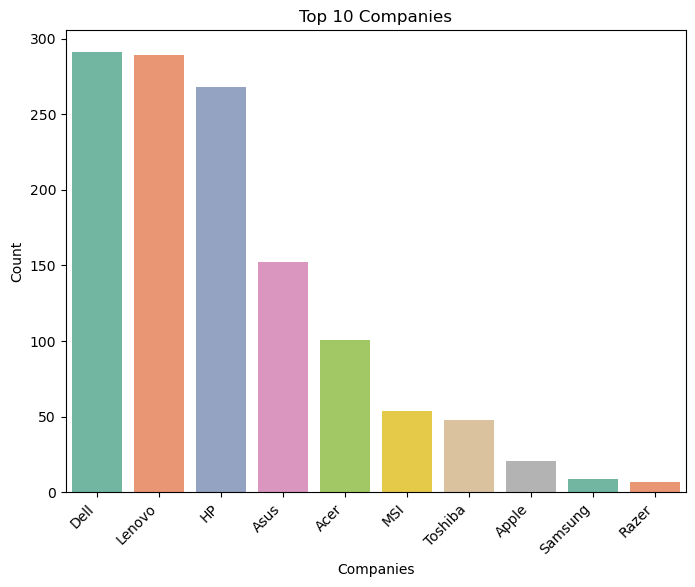

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_companies.index,y=top_companies.values, hue=top_companies.index, palette='Set2', legend=False)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.title('Top 10 Companies')
plt.show()

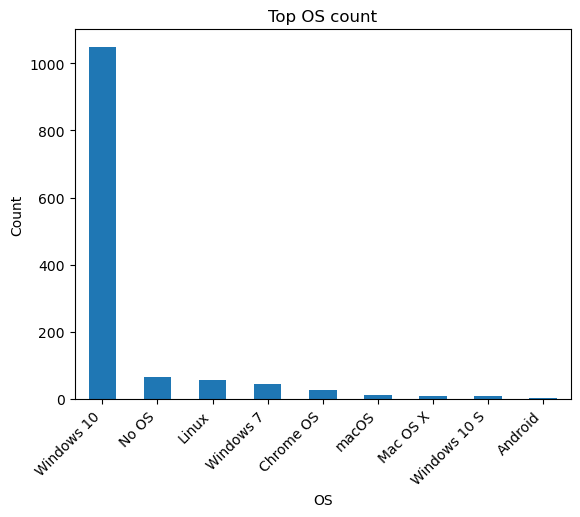

In [18]:
df['OS'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Top OS count')
plt.xticks(rotation=45,ha='right')
plt.show()

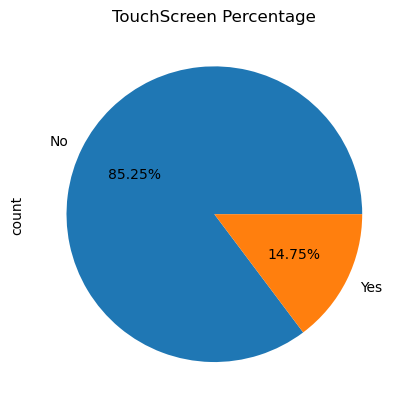

In [19]:
df['Touchscreen'].value_counts().plot(kind='pie',autopct = '%.2f%%' ,title = 'TouchScreen')
plt.title('TouchScreen Percentage')
plt.show()

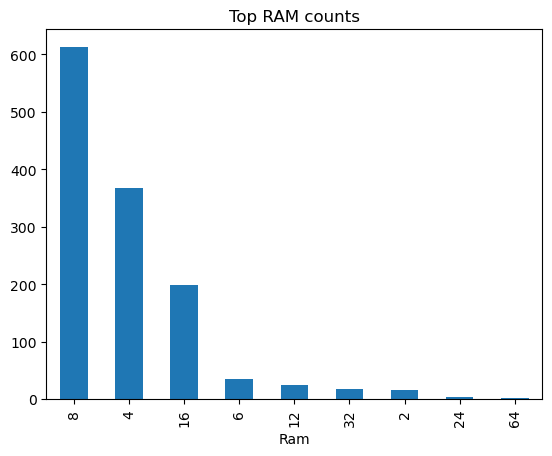

In [20]:
df['Ram'].value_counts().plot(kind='bar')
plt.title('Top RAM counts')
plt.show()

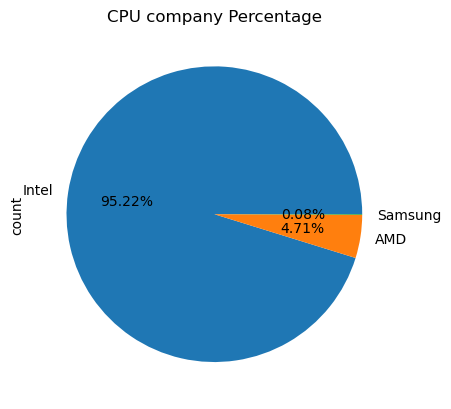

In [21]:
df['CPU_company'].value_counts().plot(kind='pie',autopct = '%.2f%%' ,title = 'CPU company')
plt.title('CPU company Percentage')
plt.show()

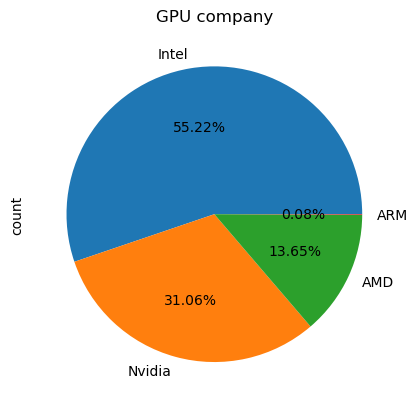

In [22]:
df['GPU_company'].value_counts().plot(kind='pie',autopct = '%.2f%%' ,title = 'GPU company')
plt.show()

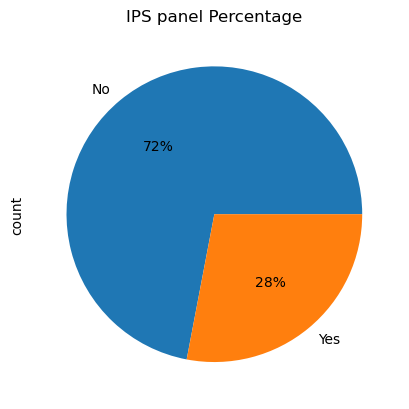

In [23]:
df['IPSpanel'].value_counts().plot(kind='pie',autopct = '%.f%%')
plt.title('IPS panel Percentage')
plt.show()

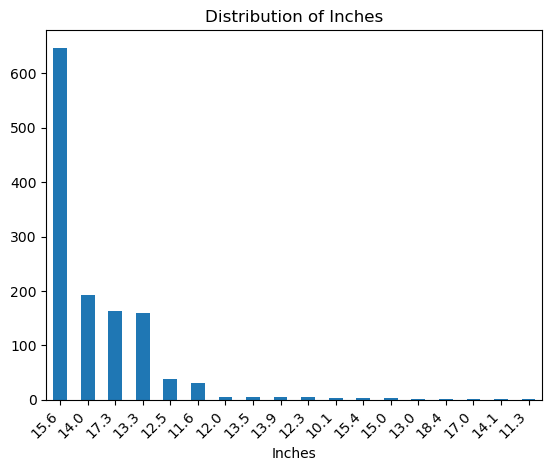

In [24]:
df['Inches'].value_counts().plot(kind='bar')
plt.title('Distribution of Inches')
plt.xticks(rotation=45,ha='right')
plt.show()

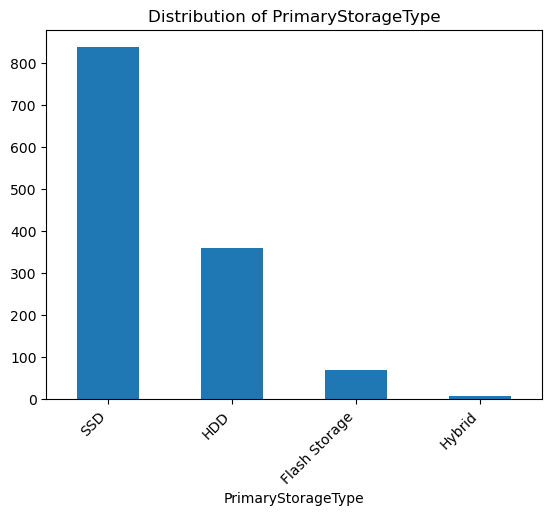

In [25]:
df['PrimaryStorageType'].value_counts().plot(kind='bar')
plt.title('Distribution of PrimaryStorageType')
plt.xticks(rotation=45,ha='right')
plt.show()

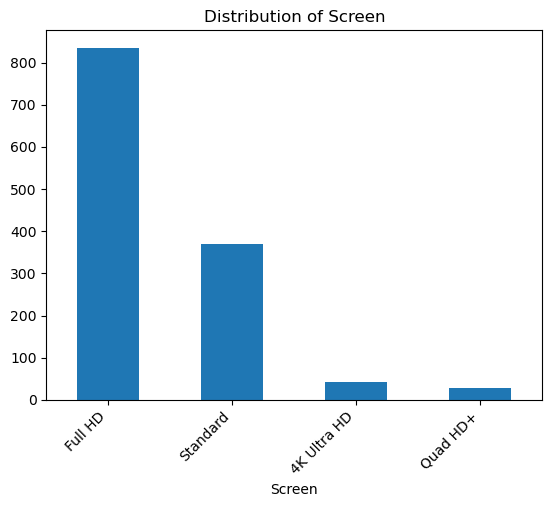

In [26]:
df['Screen'].value_counts().plot(kind='bar')
plt.title('Distribution of Screen')
plt.xticks(rotation=45,ha='right')
plt.show()

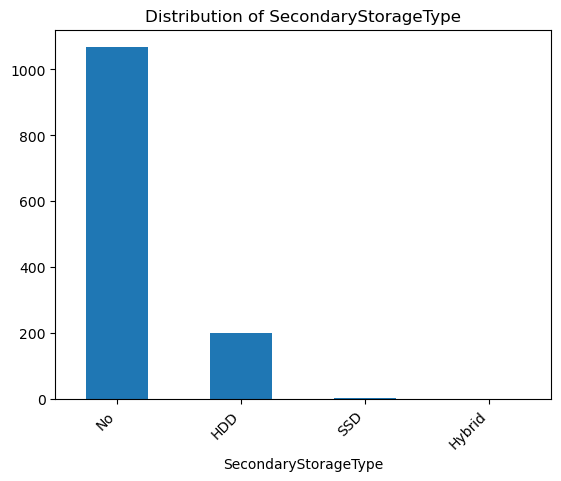

In [27]:
df['SecondaryStorageType'].value_counts().plot(kind = 'bar')
plt.title('Distribution of SecondaryStorageType')
plt.xticks(rotation=45,ha='right')
plt.show()

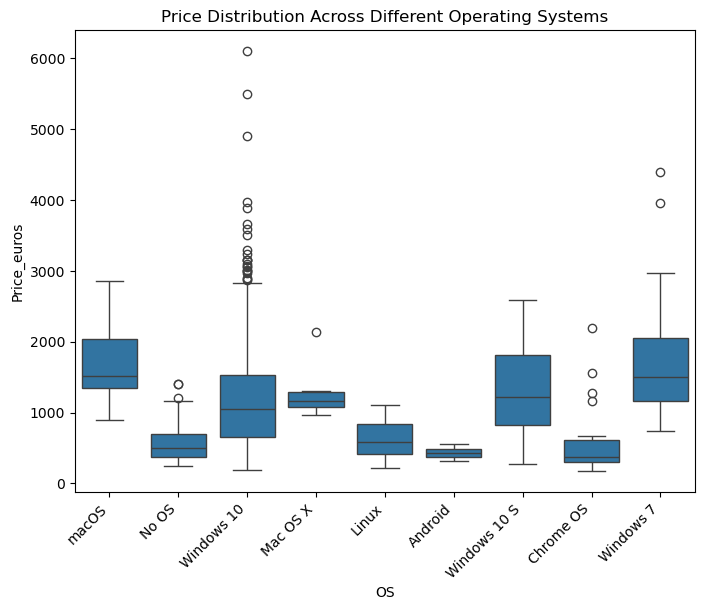

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['OS'],y=df['Price_euros'])
plt.xticks(rotation=45,ha='right')
plt.title('Price Distribution Across Different Operating Systems')
plt.show()

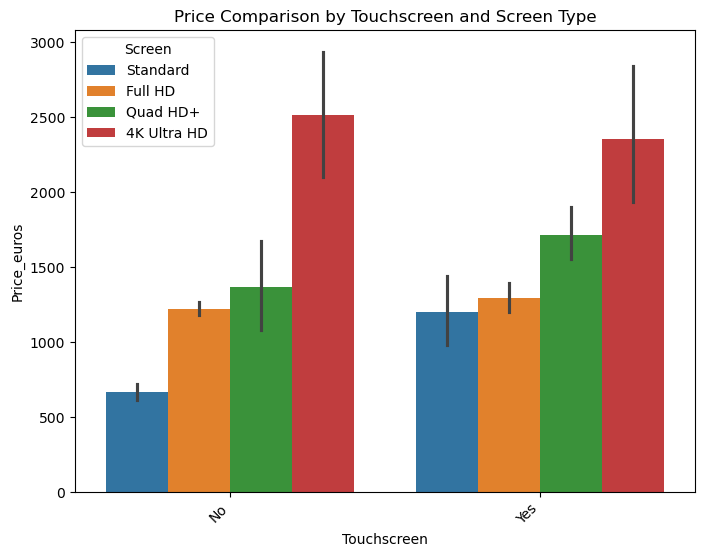

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'],hue=df['Screen'])
plt.xticks(rotation=45,ha='right')
plt.title('Price Comparison by Touchscreen and Screen Type')
plt.show()

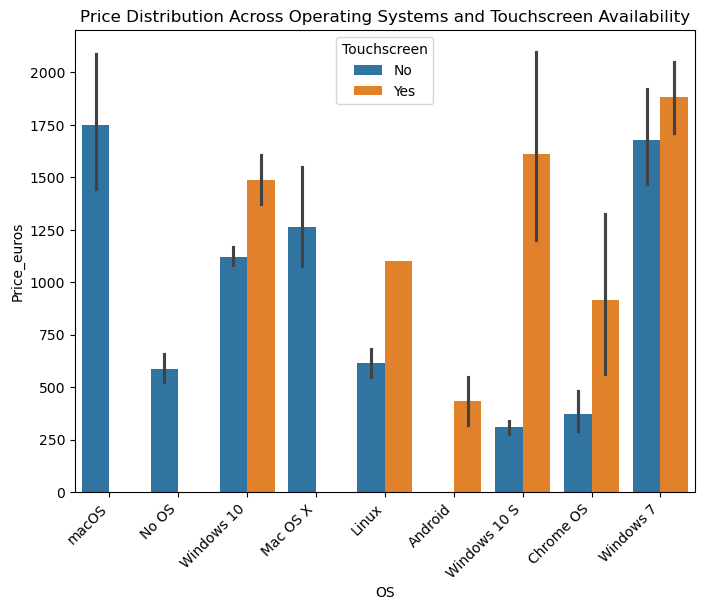

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['OS'],y=df['Price_euros'],hue=df['Touchscreen'])
plt.xticks(rotation=45,ha='right')
plt.title('Price Distribution Across Operating Systems and Touchscreen Availability')
plt.show()

### Feature Engineering and Data Preprocessing

In [32]:
correlation=df[['Inches','Ram','Weight','Price_euros','ScreenW','ScreenH','CPU_freq','PrimaryStorage','SecondaryStorage']].corr()
correlation

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
Inches,1.000000,0.241078,0.826638,0.066608,-0.068223,-0.093062,0.305037,0.264280,0.389067
Ram,0.241078,1.000000,0.389370,0.740287,0.424089,0.415241,0.366254,0.015365,0.390939
Weight,0.826638,0.389370,1.000000,0.211883,-0.028605,-0.050106,0.318649,0.175433,0.481495
Price_euros,0.066608,0.740287,0.211883,1.000000,0.552491,0.548529,0.428847,-0.124775,0.291207
ScreenW,-0.068223,0.424089,-0.028605,0.552491,1.000000,0.994069,0.178659,-0.072977,0.146232
ScreenH,-0.093062,0.415241,-0.050106,0.548529,0.994069,1.000000,0.164369,-0.080135,0.135293
CPU_freq,0.305037,0.366254,0.318649,0.428847,0.178659,0.164369,1.000000,0.056320,0.224521
PrimaryStorage,0.264280,0.015365,0.175433,-0.124775,-0.072977,-0.080135,0.056320,1.000000,-0.244182
SecondaryStorage,0.389067,0.390939,0.481495,0.291207,0.146232,0.135293,0.224521,-0.244182,1.000000


In [33]:
df_encoded=pd.get_dummies(df,columns=['Company', 'Product', 'TypeName','OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],drop_first=True)

In [34]:
df_encoded.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,True,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,True,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,True,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df_encoded['screen_area'] = df_encoded['ScreenW'] * df_encoded['ScreenH']
df_encoded.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,...,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620,screen_area
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,True,...,False,False,False,False,False,False,False,False,False,4096000
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,True,...,False,False,False,False,False,False,False,False,False,1296000
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,2073600
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,True,...,False,False,False,False,False,False,False,False,False,5184000
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,True,...,False,False,False,False,False,False,False,False,False,4096000


In [36]:
df_encoded = df_encoded.drop(['ScreenW', 'ScreenH'], axis=1)

In [37]:
features=['Inches','PrimaryStorage','screen_area']
scaler = StandardScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])
df_encoded.head()

,Inches,Ram,Weight,Price_euros,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Apple,Company_Asus,Company_Chuwi,...,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620,screen_area
0,-1.205746,8,1.37,1339.69,2.3,-0.866236,0,True,False,False,...,False,False,False,False,False,False,False,False,False,1.376413
1,-1.205746,8,1.34,898.94,1.8,-0.866236,0,True,False,False,...,False,False,False,False,False,False,False,False,False,-0.634604
2,0.403873,8,1.86,575.00,2.5,-0.515929,0,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.076116
3,0.263906,16,1.83,2537.45,2.7,0.184684,0,True,False,False,...,False,False,False,False,False,False,False,False,False,2.157837
4,-1.205746,8,1.37,1803.60,3.1,-0.515929,0,True,False,False,...,False,False,False,False,False,False,False,False,False,1.376413


In [38]:
X = df_encoded.drop('Price_euros',axis=1).values
y = df_encoded['Price_euros'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
score_lr=r2_score(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
print("R2 Score for LinearRegression:",score_lr)
print("MSE for LinearRegression:",mse_lr)

R2 Score for LinearRegression: -6.1463306153194856e+16
MSE for LinearRegression: 3.0506652801078523e+22


### Model training Lasso and Ridge

In [142]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
score_lasso=r2_score(y_test,y_pred_lasso)
mse_lasso=mean_squared_error(y_test,y_pred_lasso)
print("R2 Score for Lasso Regression:",score_lasso)
print("MSE for Lasso Regression:",mse_lasso)

R2 Score for Lasso Regression: 0.8808729825951136
MSE for Lasso Regression: 59127.417424322935


In [136]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)
score_ridge=r2_score(y_test,y_pred_ridge)
mse_ridge=mean_squared_error(y_test,y_pred_ridge)
print("R2 Score for Ridge Regression:",score_ridge)
print("MSE for Ridge Regression:",mse_ridge)

R2 Score for Ridge Regression: 0.886638176650298
MSE for Ridge Regression: 56265.925188061046


### Model training DecisionTree

In [45]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred_dt=tree.predict(X_test)
score_dt=r2_score(y_test,y_pred_dt)
mse_dt=mean_squared_error(y_test,y_pred_dt)
print("R2 Score for DecisionTree:",score_dt)
print("MSE for DecisionTree:",mse_dt)

R2 Score for DecisionTree: 0.7572626153198275
MSE for DecisionTree: 120480.09747186275


### Model training RandomForest

In [47]:
rf = RandomForestRegressor(max_depth=30,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
score_rf=r2_score(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
print("R2 Score for RandomForest:",score_rf)
print("MSE for RandomForest:",mse_rf)

R2 Score for RandomForest: 0.866180850951567
MSE for RandomForest: 66419.69938911464


### Model training GradientBoosting

In [49]:
gd=GradientBoostingRegressor(n_estimators=450,learning_rate=0.2,max_depth=5,min_samples_split=8)
gd.fit(X_train,y_train)
y_pred_gd=gd.predict(X_test)
score_gd=r2_score(y_test,y_pred_gd)
mse_gd=mean_squared_error(y_test,y_pred_gd)
print("R2 Score for GradientBoosting:",score_gd)
print("MSE for GradientBoosting:",mse_gd)

R2 Score for GradientBoosting: 0.910014633424046
MSE for GradientBoosting: 44663.271586273324


In [92]:
np.average(cross_val_score(gd, X, y, cv=10))

0.8483027581819812

### Model training XGBoost

In [102]:
xg=XGBRegressor(n_estimators=200,max_depth=5)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
score_xg=r2_score(y_test,y_pred_xg)
mse_xg=mean_squared_error(y_test,y_pred_xg)
print("R2 Score for XGBoost:",score_xg)
print("MSE for XGtBoost:",mse_xg)

R2 Score for XGBoost: 0.9000286361362612
MSE for XGtBoost: 49619.71423795337


In [104]:
np.average(cross_val_score(xg, X, y, cv=10))

0.8467737956352872